In [1]:
import pandas as pd

import numpy as np

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#get dataset
df=pd.read_csv('movie.csv')

In [4]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings=pd.read_csv('rating.csv')

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40


In [8]:
ratings=ratings[['movieId','rating']]

In [10]:
ratings.head()

,movieId,rating
0,2.0,3.5
1,29.0,3.5
2,32.0,3.5
3,47.0,3.5
4,50.0,3.5


In [11]:
df=pd.merge(df,ratings)

In [12]:
df.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [13]:
#exploratory data analysis

In [14]:
import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Deep End (1970)                                                                5.0
Crooks in Clover (a.k.a. Monsieur Gangster) (Les tontons flingueurs) (1963)    5.0
Dirty Carnival, A (Biyeolhan geori) (2006)                                     5.0
Welcome Home, Roscoe Jenkins (2008)                                            5.0
Raze (2013)                                                                    5.0
                                                                              ... 
Metalstorm: The Destruction of Jared-Syn (1983)                                0.5
Dorm Daze (National Lampoon Presents Dorm Daze) (2003)                         0.5
Demons (Dèmoni) (1985)                                                         0.5
Errand Boy, The (1961)                                                         0.5
Cool as Ice (1991)                                                             0.5
Name: rating, Length: 11980, dtype: float64

In [21]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Pulp Fiction (1994)                                     1507
Forrest Gump (1994)                                     1485
Silence of the Lambs, The (1991)                        1375
Shawshank Redemption, The (1994)                        1368
Jurassic Park (1993)                                    1324
                                                        ... 
Red and the White, The (Csillagosok, katonák) (1967)       1
Red's Dream (1987)                                         1
Red-Headed Woman (1932)                                    1
Redacted (2007)                                            1
$5 a Day (2008)                                            1
Name: rating, Length: 11980, dtype: int64

In [31]:
#creat a dataframe
rating=pd.DataFrame(df.groupby('title').mean()['rating'])


In [32]:
rating.head()

,rating
title,
$5 a Day (2008),3.000000
'Hellboy': The Seeds of Creation (2004),3.333333
'Neath the Arizona Skies (1934),3.500000
'Round Midnight (1986),3.666667
'Salem's Lot (2004),2.625000


In [33]:
rating['no of ratings']=df.groupby('title').count()['rating']

In [34]:
rating.head()

,rating,no of ratings
title,,
$5 a Day (2008),3.000000,1
'Hellboy': The Seeds of Creation (2004),3.333333,3
'Neath the Arizona Skies (1934),3.500000,1
'Round Midnight (1986),3.666667,3
'Salem's Lot (2004),2.625000,4


In [35]:
rating.sort_values(by='rating',ascending=False)

,rating,no of ratings
title,,
Callas Forever (2002),5.0,1
Damage (Fatale) (1992),5.0,1
Burma VJ: Reporting from a Closed Country (Burma VJ: Reporter i et lukket land) (2008),5.0,1
Prince Valiant (1954),5.0,1
Rhyme & Reason (1997),5.0,1
...,...,...
Eaten Alive (1977),0.5,1
"Easy Come, Easy Go (1967)",0.5,1
Easy (2003),0.5,2


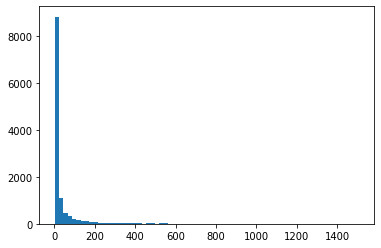

In [37]:
plt.hist(rating['no of ratings'],bins=70)
plt.show()

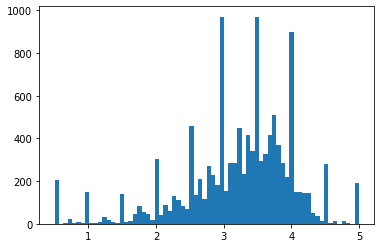

In [38]:
plt.hist(rating['rating'],bins=70)
plt.show()

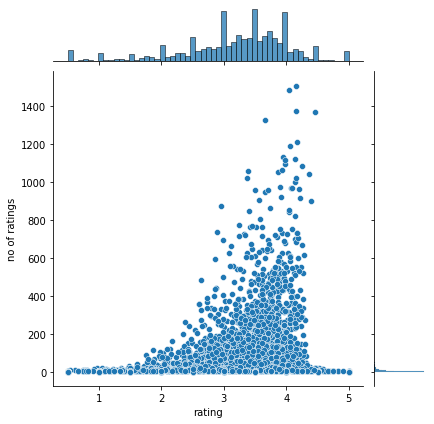

In [40]:
sns.jointplot(x='rating',y='no of ratings',data=rating)

In [41]:
#create movie recommendation
df.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [42]:
id=pd.read_csv('tag.csv')

In [43]:
id.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [44]:
id=id[['userId','movieId']]

In [45]:
id.head()

,userId,movieId
0,18,4141
1,65,208
2,65,353
3,65,521
4,65,592


In [48]:
df=pd.merge(df,id,on='movieId')

In [49]:
df.head()

,movieId,title,genres,rating,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1644
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1741
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1741
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1741
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1741


In [50]:
movie_matrix=df.pivot_table(index='userId',columns='title',values='rating')

In [52]:
movie_matrix.head()

title,'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),.45 (2006),10 (1979),10 Items or Less (2006),10 Rillington Place (1971),10 Things I Hate About You (1999),10 to Midnight (1983),"10,000 BC (2008)",100 Feet (2008),100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09\\""01 - September 11 (2002)""",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),12th & Delaware (2010),...,Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zen Noir (2004),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zizek! (2005),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombie Strippers! (2008),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu Dawn (1979),[REC] (2007),[REC]² (2009),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#highest no of ratings
rating.sort_values('no of ratings',ascending=False).head()

,rating,no of ratings
title,,
Pulp Fiction (1994),4.148640,1507
Forrest Gump (1994),4.042761,1485
"Silence of the Lambs, The (1991)",4.159636,1375
"Shawshank Redemption, The (1994)",4.463816,1368
Jurassic Park (1993),3.662009,1324


In [57]:
movie_user_rating=movie_matrix['Jurassic Park (1993)']
movie_user_rating.head()

userId
18    NaN
65    NaN
96    NaN
121   NaN
129   NaN
Name: Jurassic Park (1993), dtype: float64

In [59]:
similar_to_movie=movie_matrix.corrwith(movie_user_rating)
similar_to_movie.head()

title
'Neath the Arizona Skies (1934)   NaN
'Round Midnight (1986)            NaN
'Salem's Lot (2004)               NaN
'burbs, The (1989)                NaN
'night Mother (1986)              NaN
dtype: float64

In [60]:
corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
corr_movie.dropna(inplace=True)

In [61]:
corr_movie.head()

,Correlation
title,
...And Justice for All (1979),1.0
12 Angry Men (1957),-1.0
12 Angry Men (1997),-1.0
127 Hours (2010),-1.0
2001: A Space Odyssey (1968),1.0


In [62]:
corr_movie.sort_values('Correlation',ascending=False).head()

,Correlation
title,
...And Justice for All (1979),1.0
Junior (1994),1.0
Mad Max Beyond Thunderdome (1985),1.0
"Maltese Falcon, The (1941)",1.0
Man of the Year (2006),1.0


In [63]:
corr_movie=corr_movie.join(rating['no of ratings'])
corr_movie.head()

,Correlation,no of ratings
title,,
...And Justice for All (1979),1.0,24
12 Angry Men (1957),-1.0,287
12 Angry Men (1997),-1.0,5
127 Hours (2010),-1.0,49
2001: A Space Odyssey (1968),1.0,579


In [64]:
corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no of ratings
title,,
Licence to Kill (1989),1.0,106
Godzilla (1998),1.0,152
"Firm, The (1993)",1.0,567
Forrest Gump (1994),1.0,1485
Four Rooms (1995),1.0,124
...,...,...
Ghostbusters II (1989),-1.0,173
"Rocky Horror Picture Show, The (1975)",-1.0,329
Rocky II (1979),-1.0,137


In [65]:
#predict function

In [75]:
def Predict_movie(movie):
  movie_user_rating=movie_matrix[movie]
  similar_to_movie=movie_matrix.corrwith(movie_user_rating)

  corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
  corr_movie.dropna(inplace=True)

  corr_movie=corr_movie.join(rating['no of ratings'])
  predicton=corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation',ascending=False)
  return predicton

In [76]:
rr=Predict_movie('Licence to Kill (1989)')

In [77]:
rr.head()

,Correlation,no of ratings
title,,
2001: A Space Odyssey (1968),1.0,579
Licence to Kill (1989),1.0,106
Donnie Darko (2001),1.0,435
Pulp Fiction (1994),1.0,1507
"Matrix, The (1999)",1.0,1121


In [78]:
rr=Predict_movie('Donnie Darko (2001)')
rr.head()

,Correlation,no of ratings
title,,
Jurassic Park III (2001),1.0,143
Notorious (1946),1.0,101
"Others, The (2001)",1.0,210
On the Waterfront (1954),1.0,112
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),1.0,532
